In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import re 
%matplotlib inline 

import warnings
warnings.filterwarnings("ignore")
plt.style.use('ggplot')

import nltk
from nltk import word_tokenize

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter
from wordcloud import WordCloud

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [ ]:
d1 = pd.read_csv('/content/drive/MyDrive/Reviews.csv')

In [ ]:
print(d1.shape)
d1.tail(10)

(568454, 10)


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
568444,568445,B001EO7N10,A2SD7TY3IOX69B,"BayBay ""BayBay Knows Best""",3,3,5,1245369600,Best Value for Chinese 5 Spice,"As a foodie, I use a lot of Chinese 5 Spice po..."
568445,568446,B001EO7N10,A2E5C8TTAED4CQ,S. Linkletter,2,2,5,1268006400,Five Spice Powder,"You can make this mix yourself, but the Star A..."
568446,568447,B001EO7N10,A2P9W8T7NTLG2Z,Andy,0,0,2,1328918400,Mixed wrong,I had ordered some of these a few months back ...
568447,568448,B001EO7N10,APWCOAVILK94B,"Real Named Person ""wowzee""",0,0,5,1322524800,"If its all natural, this is like panacea of Sp...","Hoping there is no MSG in this, this tastes ex..."
568448,568449,B001EO7N10,A1F6BHEYB7R6R7,James Braley,0,0,5,1308096000,Very large ground spice jars.,My only complaint is that there's so much of i...
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o..."
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...
568453,568454,B001LR2CU2,A3LGQPJCZVL9UC,srfell17,0,0,5,1338422400,Great Honey,"I am very satisfied ,product is as advertised,..."


In [ ]:
# making data slim
d2 = d1.sample(frac= 0.20,replace = True).reset_index(drop = True)

print(d2.shape)
d2.head(10)

(1637, 10)


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,5521,B001EQ5DHE,AWZAWKBRY2I4S,Harry Miller,0,0,5,1249776000,Great For Summer Hydration,Great basic hydration for summer. Satisfied wi...
1,6946,B001LG945O,A16YU3GRGCD95S,"Theresa M. Studer ""Terra57""",0,0,4,1247443200,Really Not Too Bad,I usually drink my soda room temperature but w...
2,11,B0001PB9FE,A3HDKO7OW0QNK4,Canadian Fan,1,1,5,1107820800,The Best Hot Sauce in the World,I don't know if it's the cactus or the tequila...
3,4134,B001EW5YQS,AXGZILBCKE0B4,drez,0,0,3,1319673600,Iffy,it is what is is... and it did the job that it...
4,1449,B001E50UEQ,A3A7AWWYDEE9QI,Deborah L Weeks,0,0,5,1282780800,Hormel Compleats are simply wonderful,These dinners are as close to perfect as can b...
5,7608,B0028GY93S,A11EELLPLULTY8,eMi,0,0,5,1348444800,High Quality that shows,I had to look for a new food for my 100 pound ...
6,1790,B001RVFDOO,A2T1NDDE2Z2OAK,Lorr914,0,0,4,1245110400,great taste now in a 100 calorie bag,"I love popchips, The bag now has only 100 calo..."
7,4960,B002RZ1QNG,A1E3EEYCOP2KDE,Rocketguy,0,0,5,1322352000,Crowd pleaser,This is my third wine kit and it's going so fa...
8,1394,B00068PCTU,AL619MA80I8RE,ASH,0,0,5,1337904000,Sweet stuff!,"I was quite skeptical about stevia at first, b..."
9,6374,B000084EKB,A1Z54EM24Y40LL,c2,0,0,4,1091059200,Great food!,This version is ground. NOt my current cat's ...


In [ ]:
d2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1637 entries, 0 to 1636
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Id                      1637 non-null   int64 
 1   ProductId               1637 non-null   object
 2   UserId                  1637 non-null   object
 3   ProfileName             1637 non-null   object
 4   HelpfulnessNumerator    1637 non-null   int64 
 5   HelpfulnessDenominator  1637 non-null   int64 
 6   Score                   1637 non-null   int64 
 7   Time                    1637 non-null   int64 
 8   Summary                 1637 non-null   object
 9   Text                    1637 non-null   object
dtypes: int64(5), object(5)
memory usage: 128.0+ KB


In [ ]:
print(d2['Score'].value_counts())
rating_pct = d2['Score'].value_counts()/len(d1) * 100
rating_pct

5    1029
4     241
1     146
3     123
2      98
Name: Score, dtype: int64


5    12.568706
4     2.943691
1     1.783315
3     1.502382
2     1.197020
Name: Score, dtype: float64

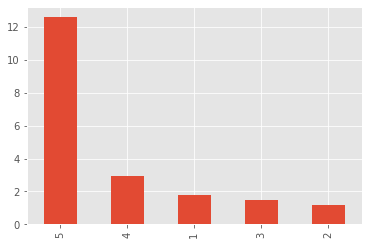

In [ ]:
rating_pct.plot.bar()
plt.show()

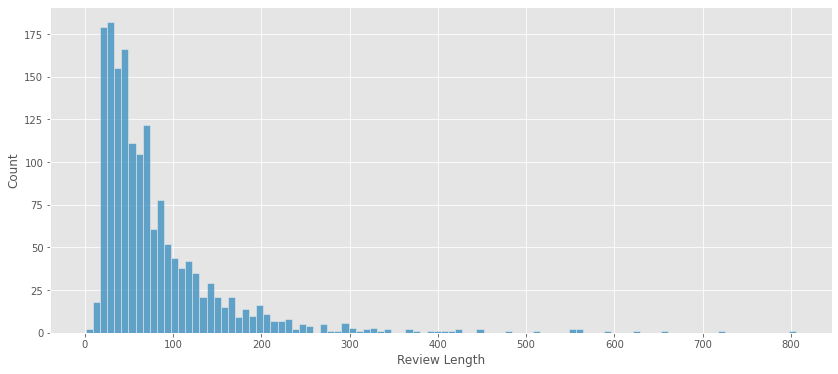

In [ ]:
#words per review
plt.figure(figsize = (14,6))
WordsPerReview = d2['Text'].apply(lambda x: len(x.split(' ')))

sns.histplot(WordsPerReview,bins = 100)

plt.xlabel('Review Length')
plt.show()

In [ ]:
d2 = pd.DataFrame(d2,columns = ['Score','Text'])
d2.rename(columns = {'Score':'Rating','Text':'Review'},inplace = True)

In [ ]:
def apply_sentiment(Rating):
    if(Rating <=2 ):
        return 0
    else:
        return 1

In [ ]:
d2['Sentiment'] = d2['Rating'].apply(apply_sentiment)
d2.drop(['Rating'],axis = 1, inplace = True)

In [ ]:
sentiment = d2['Sentiment'].value_counts()
sentiment

1    1393
0     244
Name: Sentiment, dtype: int64

In [ ]:
def clean_text(Review):
   
    Review = str(Review).lower() # convert to lowercase
    Review = re.sub('\[.*?\]', '', Review) 
    Review = re.sub('https?://\S+|www\.\S+', '', Review) # Remove URls
    Review = re.sub('<.*?>+', '', Review)
    Review = re.sub(r'[^a-z0-9\s]', '', Review) # Remove punctuation
    Review = re.sub('\n', '', Review)
    Review = re.sub('\w*\d\w*', '', Review)
    return Review

In [ ]:
d2['Review']

0       Great basic hydration for summer. Satisfied wi...
1       I usually drink my soda room temperature but w...
2       I don't know if it's the cactus or the tequila...
3       it is what is is... and it did the job that it...
4       These dinners are as close to perfect as can b...
                              ...                        
1632    These are the best skinless boneless sardines ...
1633    We were looking for an organic food after the ...
1634    Great gift for all ages! I purchased these gia...
1635    This orange soda is clearly more healthful, an...
1636    I was given a pack of this coffee as a gift an...
Name: Review, Length: 1637, dtype: object

In [ ]:
d2['Review'] = d2['Review'].apply(clean_text)
print(d2['Review'])

0       great basic hydration for summer satisfied wit...
1       i usually drink my soda room temperature but w...
2       i dont know if its the cactus or the tequila o...
3       it is what is is and it did the job that it wa...
4       these dinners are as close to perfect as can b...
                              ...                        
1632    these are the best skinless boneless sardines ...
1633    we were looking for an organic food after the ...
1634    great gift for all ages i purchased these gian...
1635    this orange soda is clearly more healthful and...
1636    i was given a pack of this coffee as a gift an...
Name: Review, Length: 1637, dtype: object


In [ ]:
d2.tail(10)

,Review,Sentiment
1627,if youre looking for a very light refreshing c...,1
1628,this jerky reminds me a little of the artisan ...,1
1629,the fact that the title of this product includ...,1
1630,the packet of these seeds that i received must...,0
1631,defintely not as tasty as the madhouse munchie...,0
1632,these are the best skinless boneless sardines ...,1
1633,we were looking for an organic food after the ...,1
1634,great gift for all ages i purchased these gian...,1
1635,this orange soda is clearly more healthful and...,1
1636,i was given a pack of this coffee as a gift an...,1


In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
stopword = []
sentence = d2['Review'][0]


#words = nltk.word_tokenize(sentence)


def remove_stopword(stop_words, sentence):
    return [word for word in nltk.word_tokenize(sentence) if word not in stop_words]

d2['reviews_text'] = d2['Review'].apply(lambda row: remove_stopword(stop_words, row))

## need to convert list into string
d2['reviews_text'] = d2['reviews_text'].apply(lambda row: ','.join(row))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
d2.tail(10)

,Review,Sentiment,reviews_text
1627,if youre looking for a very light refreshing c...,1,"youre,looking,light,refreshing,coffee,one,nice..."
1628,this jerky reminds me a little of the artisan ...,1,"jerky,reminds,little,artisan,jerky,used,able,f..."
1629,the fact that the title of this product includ...,1,"fact,title,product,includes,number,misleading,..."
1630,the packet of these seeds that i received must...,0,"packet,seeds,received,must,old,dont,believe,ev..."
1631,defintely not as tasty as the madhouse munchie...,0,"defintely,tasty,madhouse,munchies,familys,favo..."
1632,these are the best skinless boneless sardines ...,1,"best,skinless,boneless,sardines,ive,tried,reas..."
1633,we were looking for an organic food after the ...,1,"looking,organic,food,melamine,poisoning,pet,fo..."
1634,great gift for all ages i purchased these gian...,1,"great,gift,ages,purchased,giant,canes,recipien..."
1635,this orange soda is clearly more healthful and...,1,"orange,soda,clearly,healthful,tastes,tangier,a..."
1636,i was given a pack of this coffee as a gift an...,1,"given,pack,coffee,gift,sitting,around,quite,ye..."


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
clf = Pipeline([
    ('vect', CountVectorizer(stop_words= "english")),
    ('tfidf', TfidfTransformer()),
    ('classifier', MultinomialNB()),
    ])

In [ ]:
X = d2['reviews_text']
y = d2['Sentiment']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = 42,
                                                   test_size = 0.20)
X_train.shape,X_test.shape,y_train.shape

((1309,), (328,), (1309,))

In [ ]:
fit_model = clf.fit(X_train,y_train)

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
print('Training accuracy:', fit_model.score(X_train,y_train))
print('Test accuracy:', fit_model.score(X_test,y_test))

Training accuracy: 0.8495034377387318
Test accuracy: 0.8567073170731707


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,y_pred))

print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        47
           1       0.86      1.00      0.92       281

    accuracy                           0.86       328
   macro avg       0.43      0.50      0.46       328
weighted avg       0.73      0.86      0.79       328

[[  0  47]
 [  0 281]]
